##### Instalar librerías necesarias

In [3]:
!pip install -r reqs.txt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\jynsordonez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Cargar librerias

In [4]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

### 1 Cargar y Explorar el Archivo HDF5

Hemos cargado el archivo `train.h5` utilizando la librería `h5py`.
Hemos listado las claves del archivo, las cuales representan las principales estructuras de datos (por ejemplo, las señales EEG y las etiquetas). 
Verificamos las dimensiones y el tipo de datos de cada clave, lo que nos ayudará a comprender mejor la organización de la información.

- **`keys`**: Listado de claves dentro del archivo HDF5.
- **`dataset_info`**: Diccionario que contiene la forma y el tipo de dato de cada clave.


In [7]:
with h5py.File('train.h5', 'r') as f:
    keys = list(f.keys())
    print("Claves del archivo:", keys)
    dataset_info = {}
    for key in keys:
        data = f[key]
        dataset_info[key] = {
            'shape': data.shape,
            'dtype': data.dtype
        }

dataset_info

Claves del archivo: ['x', 'y']


{'x': {'shape': (204, 1, 18530), 'dtype': dtype('<f8')},
 'y': {'shape': (204,), 'dtype': dtype('int64')}}

### 2 Verificación de las Señales (X) y las Etiquetas (Y)

Hemos cargado los datos de las señales (`X_train`) y las etiquetas (`y_train`) a partir de las claves correspondientes en el archivo
- **`X_train`**: señales EEG de los sujetos. Su forma es `(204, 1, 18530)`, 204 sujetos, cada uno con una señal de un canal (o electrodo) y una longitud de 18530 muestras.
- **`y_train`**: etiquetas correspondientes a cada sujeto. Su forma es `(204,)`, lo que indica que hay 204 etiquetas, una por cada sujeto. Estas etiquetas indican si el sujeto es alcohólico o control.


In [12]:
with h5py.File('train.h5', 'r') as f:
    X_train = np.array(f['x']) 
    y_train = np.array(f['y'])  

X_train.shape, y_train.shape


((204, 1, 18530), (204,))

### 3. Visualizar una Muestra de las Señales EEG
Aquí hemos visualizado la señal EEG correspondiente al primer sujeto en el conjunto de datos. Cada muestra tiene una longitud de 18530 muestras, que representan el voltaje medido por un electrodo a lo largo de 1 segundo.

- **Eje X**: Tiempo (en número de muestras).
- **Eje Y**: Voltaje medido por el electrodo en cada muestra.

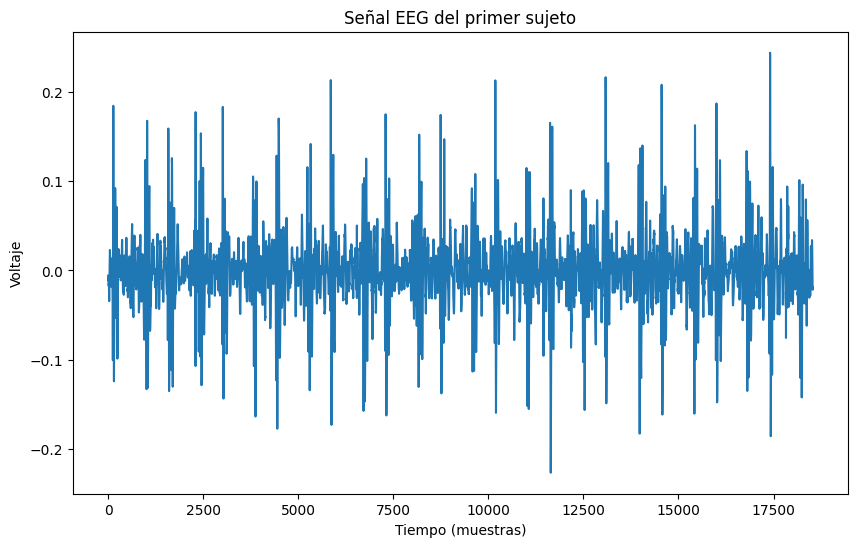

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(X_train[0, 0, :])
plt.title('Señal EEG del primer sujeto')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Voltaje')
plt.show()


### Exploración de las Etiquetas (Y)

Hemos visualizado las primeras 30 etiquetas del conjunto de datos.
Estas etiquetas indican si un sujeto es parte del grupo de **alcohólicos** o **control**.

In [17]:
y_train[:30]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0])